---
# **Installing Necessary Packages**
---

In [1]:
!pip install nltk
import nltk
# Download necessary resources from NLTK
nltk.download('punkt')
nltk.download('wordnet')
!pip install neattext

[nltk_data] Downloading package punkt to C:\Users\Zee
[nltk_data]     Tech\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Zee
[nltk_data]     Tech\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

---
# **Importing Necessary Packages**
---

In [154]:
import pandas as pd
import numpy as np
import neattext as nt
import nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

---
# **Reading the Datasets**
---

In [155]:
train_reviews_df=pd.read_csv('train_reviews.csv')
test_reviews_df=pd.read_csv('test_reviews.csv')
price_df=pd.read_csv('price_data.csv')

In [156]:
test_reviews_df.shape

(43640, 10)

In [157]:
train_reviews_df[train_reviews_df['fake_review']==1].shape

(20065, 11)

---
# **Exploratory Data Analysis**
---

### **Checking Null Values**

In [158]:
train_reviews_df.isnull().sum()  #checking null values training data

review_title        357
review_body          44
review_date           0
review_rating         0
number_of_photos      0
helpful_vote          0
reviewer_ID           0
fake_asin             0
fake_review           0
product_ID            0
review_ID             0
dtype: int64

In [159]:
test_reviews_df.isnull().sum()  #checking null values testing data

review_title        33
review_body          3
review_date          0
review_rating        0
number_of_photos     0
helpful_vote         0
reviewer_ID          0
fake_asin            0
product_ID           0
review_ID            0
dtype: int64

### **Dropping Null Values**

In [160]:
train_reviews_df=train_reviews_df.dropna()   #dropping null values from training data

In [161]:
test_reviews_df=test_reviews_df.fillna(test_reviews_df['review_body'].mode()[0],axis=0)

In [162]:
test_reviews_df['review_body'].mode()[0]

'Good'

In [163]:
#test_reviews_df=test_reviews_df.dropna(axis=0)  #dropping null values from testing data

### **Revenue By Fake Reviewed Products**

In [164]:
df=train_reviews_df[train_reviews_df['fake_review']==1]    #separating fake reviews

In [165]:
fake_prod_sold_price=price_df.merge(df,on='product_ID')    #merging fake reviews and price data

In [166]:
fake_prod_sold_price['price']=fake_prod_sold_price['price']/10000   #diving price by 10000

In [167]:
fake_prod_sold_price=fake_prod_sold_price.groupby('product_ID')[['product_ID','price']].sum()
#calculating sum of prices where fake_review==1

In [168]:
fake_prod_sold_price=fake_prod_sold_price.sort_values(by=['price'],ascending=False)[0:10]
#selecting top 10 products

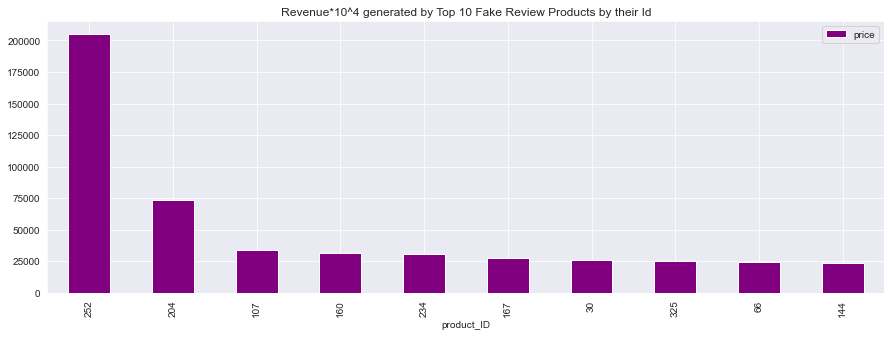

In [169]:
fake_prod_sold_price[['price']].plot(kind='bar',figsize=(15,5),color='purple')
plt.title('Revenue*10^4 generated by Top 10 Fake Review Products by their Id')
plt.show()


### **Separating Text of Fake and Legit Reviews**

In [170]:
fake_reviews_text=''.join(train_reviews_df[train_reviews_df['fake_review']==1]['review_body'])
legit_reviews_text=''.join(str(train_reviews_df[train_reviews_df['fake_review']==0]['review_body']))

### **Word Cloud for Fake Reviews**

In [171]:
fake_reviews_text=nt.remove_stopwords(fake_reviews_text)             #removing stopwords
fake_reviews_text=nt.remove_numbers(fake_reviews_text)               #removing numbers
fake_reviews_text=nt.remove_special_characters(fake_reviews_text)    #removing special characters
fake_reviews_text=nt.remove_shortwords(fake_reviews_text,3)          #removing words of length 3

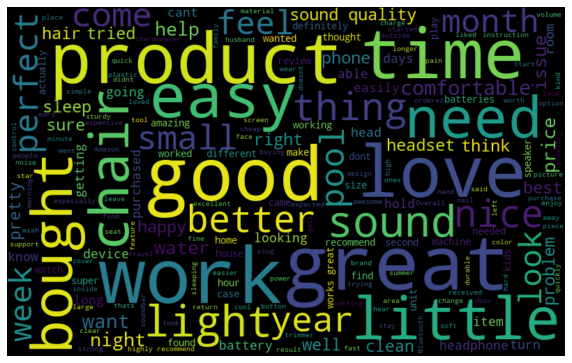

In [172]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(fake_reviews_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### **Word Cloud for Legit Reviews**

In [173]:
legit_reviews_text=nt.remove_stopwords(legit_reviews_text)         #removing stopwords
legit_reviews_text=nt.remove_numbers(legit_reviews_text)           #removing numbers
legit_reviews_text=nt.remove_special_characters(legit_reviews_text) #removing special characters
legit_reviews_text=nt.remove_shortwords(legit_reviews_text,3)       #removing words of length 3

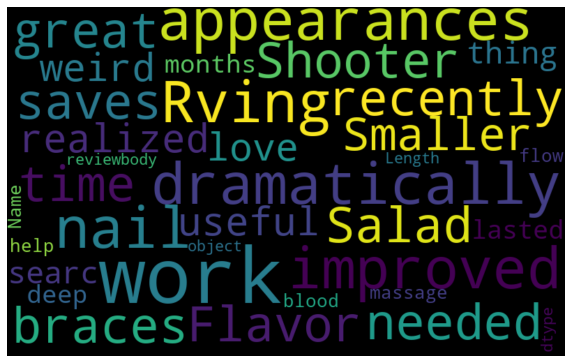

In [174]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(legit_reviews_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

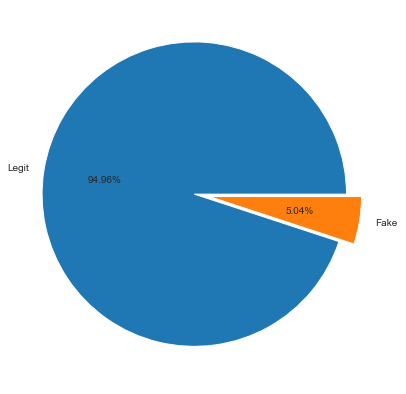

In [175]:
plt.figure(figsize=(7,7))
plt.pie(train_reviews_df['fake_review'].value_counts().values,labels=['Legit','Fake'],autopct='%.2f%%',
        explode=[0.1,0])
plt.show()

In [176]:
def make_plots(feature, title="", limited=False, n=10):
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.03]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    plt.show()

### **Rating Distribution of Fake Reviews**

5    13878
4     2197
1     1822
3     1019
2      863
Name: review_rating, dtype: int64


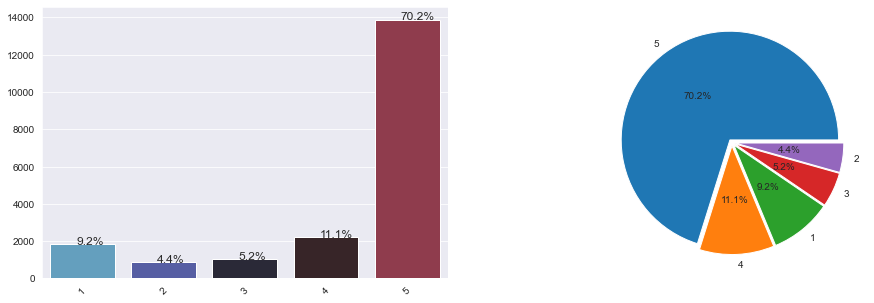

In [177]:
make_plots(train_reviews_df[train_reviews_df['fake_review']==1]['review_rating'])

### **Rating Distribution of Legit Reviews**

5    248117
4     46132
1     37971
3     22652
2     17732
Name: review_rating, dtype: int64


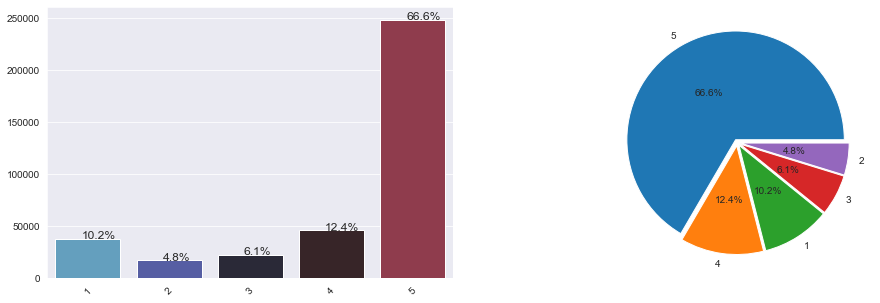

In [178]:
make_plots(train_reviews_df[train_reviews_df['fake_review']==0]['review_rating'])

In [179]:
train_reviews_df['fake_asin'].value_counts()

0    337183
1     55200
Name: fake_asin, dtype: int64

### **Whether or not the product ever collected fake reviews**

0    337183
1     55200
Name: fake_asin, dtype: int64


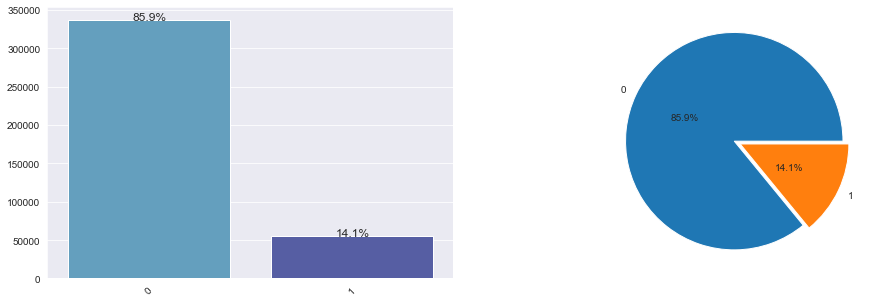

In [180]:
make_plots(train_reviews_df['fake_asin'])

### **Most Repeated Product Id for Legit Review**

In [181]:
x=train_reviews_df[train_reviews_df['fake_review']==0]['product_ID'].value_counts()[:10].index
y=train_reviews_df[train_reviews_df['fake_review']==0]['product_ID'].value_counts()[:10].values

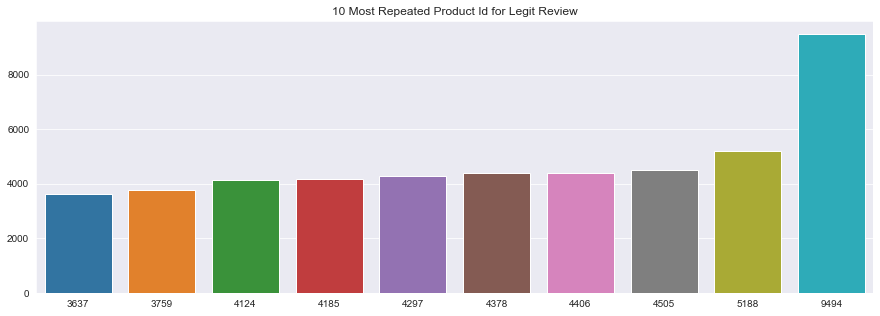

In [182]:
plt.figure(figsize=(15,5))
sns.barplot(x=y,y=y)
plt.title('10 Most Repeated Product Id for Legit Review')
plt.show()

### **Most Repeated Product Id for Fake Review**

In [183]:
x=train_reviews_df[train_reviews_df['fake_review']==1]['product_ID'].value_counts()[:10].index
y=train_reviews_df[train_reviews_df['fake_review']==1]['product_ID'].value_counts()[:10].values

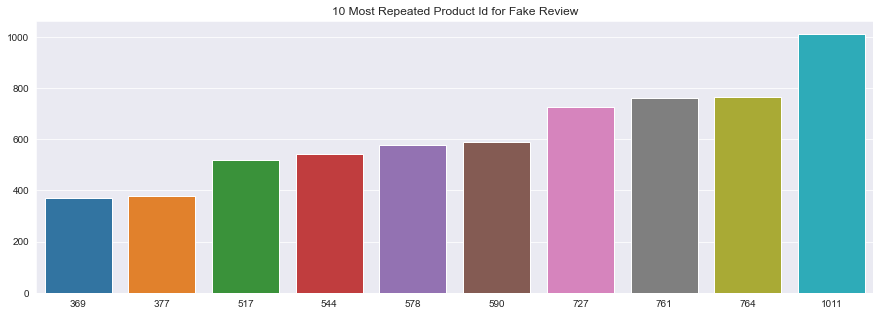

In [184]:
plt.figure(figsize=(15,5))
sns.barplot(x=y,y=y)
plt.title('10 Most Repeated Product Id for Fake Review')
plt.show()

---
# **Model Development**
---

In [185]:
fake_reviews=train_reviews_df[train_reviews_df['fake_review']==1]    #selecting fake reviews

In [186]:
legit_reviews=train_reviews_df[train_reviews_df['fake_review']==0]
#selecting legit reviews equal to fake reviews

In [187]:
train_reviews_df=pd.concat([legit_reviews,fake_reviews]) #joining fake and legit reviews

In [188]:
train_reviews_df.shape

(392383, 11)

In [189]:
train_reviews_df=train_reviews_df.sample(frac=1).reset_index()

In [190]:
def text_cleaning(text):
    text=nt.fix_contractions(text)
    text=nt.remove_special_characters(text)
    text=nt.remove_stopwords(text)
    text=nt.remove_puncts(text)
    text=nt.remove_bad_quotes(text)
    text=nt.remove_emojis(text)
    text=nt.remove_numbers(text)
    text=nt.remove_multiple_spaces(text)
    text=nt.remove_non_ascii(text)
    text=nt.remove_userhandles(text)
    text=nt.remove_shortwords(text,3)
    return text

In [191]:
# Create a WordNet lemmatizer object
lemmatizer = WordNetLemmatizer()

In [192]:
def text_lemmatization(text):
    # Tokenize the sentence into individual words
    words = nltk.word_tokenize(text)
    # Lemmatize each word in the sentence
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [193]:
test_reviews_df['review_body']=test_reviews_df['review_body'].apply(lambda x:text_cleaning(x))

In [194]:
test_reviews_df['review_body']=test_reviews_df['review_body'].apply(lambda x:text_lemmatization(x))

In [195]:
train_reviews_df['review_body']=train_reviews_df['review_body'].apply(lambda x:text_cleaning(x))

In [196]:
train_reviews_df['review_body']=train_reviews_df['review_body'].apply(lambda x:text_lemmatization(x))

### **Text Vectorization**

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer  #text vectorizing using Tfidf vectorizer

In [198]:
vect=TfidfVectorizer(max_features=4000)  #creating object of tfidf vectorizer

In [199]:
X=vect.fit_transform(train_reviews_df.review_body)  #vectorizing review_body of training reviews

In [200]:
test_reviews_df.isnull().sum()

review_title        0
review_body         0
review_date         0
review_rating       0
number_of_photos    0
helpful_vote        0
reviewer_ID         0
fake_asin           0
product_ID          0
review_ID           0
dtype: int64

In [201]:
test_data_vect=vect.transform(test_reviews_df.review_body)

In [202]:
y=train_reviews_df.fake_review

In [203]:
from sklearn.model_selection import train_test_split  #importing train test split from sklearn

### **Data Splitting**

In [204]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=42,shuffle=True)

### **Model Training**

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

+ ==================================================================================================== +
			1-For SGDClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9495903258279496
--------------------------------------------------
F1 :  [0.97414345 0.        ]
--------------------------------------------------
Reacll :  [1. 0.]
--------------------------------------------------
Precision :  [0.94959033 0.        ]
--------------------------------------------------
cross validation accuracy :  0.9495926176944881
--------------------------------------------------
Confusion Matrix....
 [[74521     0]
 [ 3956     0]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     74521
           1       0.00      0.00      0.00      3956

    accuracy             

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


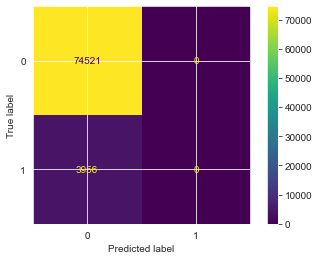

							-----------------------------------------------------------
							 Time for detection (SGDClassifier) : 14.103 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For RidgeClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9495266128929495
--------------------------------------------------
F1 :  [9.74109588e-01 5.04668181e-04]
--------------------------------------------------
Reacll :  [9.99919486e-01 2.52780586e-04]
--------------------------------------------------
Precision :  [0.94959857 0.14285714]
--------------------------------------------------
cross validation accuracy :  0.949590069177088
--------------------------------------------------
Confusion Matrix....
 [[74515     6]
 [ 3955     1]]
------------------------------------

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


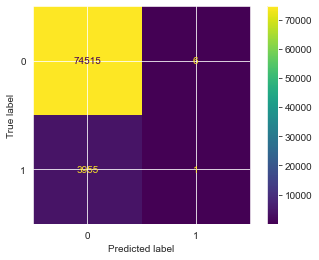

							-----------------------------------------------------------
							 Time for detection (RidgeClassifier) : 6.692 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For AdaBoostClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9493482166749494
--------------------------------------------------
F1 :  [0.97401434 0.00250941]
--------------------------------------------------
Reacll :  [0.99967794 0.0012639 ]
--------------------------------------------------
Precision :  [0.94963543 0.17241379]
--------------------------------------------------
cross validation accuracy :  0.9494193176994099
--------------------------------------------------
Confusion Matrix....
 [[74497    24]
 [ 3951     5]]
-----------------------------------------------

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


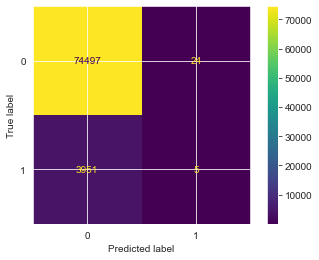

							-----------------------------------------------------------
							 Time for detection (AdaBoostClassifier) : 269.168 seconds...
							-----------------------------------------------------------



Model  Accuracy                                  Precision  \
0       SGDClassifier  0.949590                  [0.9495903258279496, 0.0]   
1     RidgeClassifier  0.949527  [0.9495985727029438, 0.14285714285714285]   
2  AdaBoostClassifier  0.949348   [0.9496354272894146, 0.1724137931034483]   

                                        Recall  \
0                                   [1.0, 0.0]   
1  [0.9999194857825311, 0.0002527805864509606]   
2  [0.9996779431301244, 0.0012639029322548028]   

                                      F1_Score          Confusion Matrix  
0                    [0.9741434528555928, 0.0]   [[74521, 0], [3956, 0]]  
1  [0.9741095881457079, 0.0005046681806712088]   [[74515, 6], [3955, 1]]  
2   [0.9740143427753335, 0.002509410288582183]  [[74497, 24], [3951, 5]]

In [205]:
# Importing Models
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report, plot_confusion_matrix

# check the performance on diffrent regressor
models = []
models.append(('SGDClassifier', SGDClassifier()))
models.append(('RidgeClassifier', RidgeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)
    
    # evaluate model
    scores = cross_val_score(clf, X, y, cv=cv, n_jobs=-1)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('cross validation accuracy : ', np.mean(scores))
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})

### **Selecting the Best Model**

In [209]:
Adabclf=AdaBoostClassifier()

In [210]:
Adabclf.fit(X_train,y_train)

AdaBoostClassifier()

In [211]:
predicitons=Adabclf.predict(test_data_vect)

In [212]:
test_reviews_df.columns

Index(['review_title', 'review_body', 'review_date', 'review_rating',
       'number_of_photos', 'helpful_vote', 'reviewer_ID', 'fake_asin',
       'product_ID', 'review_ID'],
      dtype='object')

In [213]:
predictions=pd.DataFrame(predicitons,columns=["prediction"])

In [214]:
test_reviews_df["fake_review"]=predicitons

In [215]:
test_reviews_df[['review_ID', 'fake_review']].to_csv('output1.csv')

### **Saving the Model**

In [74]:
import pickle as pkl

In [75]:
pkl.dump(Adabclf,open('Adabclf.pkl','wb'))